# Задача классификаци. Титаник

## 1. Загрузка данных

In [62]:
import pandas as pd

In [63]:
!pwd

/content


In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [65]:
!ls

catboost_info  sample_data  test.csv  train.csv


In [66]:
!pwd

/content


## 2. Пример данных

survival --	Survival	0 = No, 1 = Yes.  
pclass --	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd.  
sex --	Sex	  
Age	-- Age in years	  
sibsp	# of siblings / spouses aboard the Titanic. 	
parch	# of parents / children aboard the Titanic	  
ticket	Ticket number	  
fare	Passenger fare	  
cabin	Cabin number	  
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Выведем описательные характеристики данных

### 3.1 Статистика

In [68]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.2 Размерность данных

In [69]:
train.shape

(891, 12)

Кол-во строк = 891. 
Кол-во столбцов = 12. 

### 3.3 Кол-во пропусков в данных

In [70]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Пропущенные данные есть в столбцах: Age, Cabin, Embarked

## 4. Feature Engineering

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 Создание нового признака Title

In [72]:
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [74]:
train['n_words_name'] = train['Name'].apply(lambda x: len(x.split()))

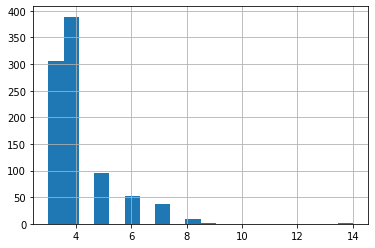

In [77]:
train['n_words_name'].hist(bins=20)

In [78]:
train['relatives'] = train['SibSp'] + train['Parch']

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,n_words_name,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,7,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,7,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,4,0


### 4.2 Преобразование категориального признака

In [80]:
#LabelEncoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

non_numeric_features = ['Title',]

for feature in non_numeric_features:        
    train[feature] = LabelEncoder().fit_transform(train[feature])

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,n_words_name,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,11,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,12,7,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,12,7,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,11,4,0


In [ ]:
#OneHotEncoding


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5.1 Удаляем атрибут **Name**

In [11]:
train = train.drop(['Name'], axis = 1)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 5.2 Удаляем атрибут **Cabin** 

In [13]:
train = train.drop(['Cabin'], axis = 1)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


### 5.3 Удаляем атрибут **Ticket, Embarked**

In [85]:
train = train.drop(['Ticket', 'Embarked'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,n_words_name,relatives
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,-1,11,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,12,7,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,-1,8,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,12,7,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,-1,11,4,0


### 5.4 Конвертируем признак Sex

In [83]:
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,n_words_name,relatives
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,11,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,12,7,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,12,7,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,11,4,0


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
5,6,0,3,0,NaN,0,0,8.4583
6,7,0,1,0,54.0,0,0,51.8625
7,8,0,3,0,2.0,3,1,21.0750
8,9,1,3,1,27.0,0,2,11.1333
9,10,1,2,1,14.0,1,0,30.0708


### 5.4 Заполнение пропусков

In [84]:
train = train.fillna(-1)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,n_words_name,relatives
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-1,S,11,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,12,7,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,8,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,12,7,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-1,S,11,4,0
5,6,0,3,"Moran, Mr. James",0,-1.0,0,0,330877,8.4583,-1,Q,11,3,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,11,4,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,-1,S,7,4,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,-1,S,12,7,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,-1,C,12,5,1


## 6 Моделирование

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


### 6.1 Составляем набор X и y

In [86]:
y = train['Survived']
X = train[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### 6.2 Разбиваем наш датасет на train, test выборки

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1810, stratify=y)

In [97]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(891, 7)
(712, 7)
(179, 7)


### 6.3 Построим модель DesicionTree

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=4)
# Обучаем модель
model.fit(X_train, y_train)

# Получаем предсказания
y_pred = model.predict(X_test)

# Измерим качество модели
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7932960893854749


### 6.4 Матрица ошибок

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[106,   4],
       [ 33,  36]])

In [100]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(106, 4, 33, 36)

In [59]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score

In [101]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.5217391304347826
0.9


### 6.5 ROC_AUC

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7176788124156545

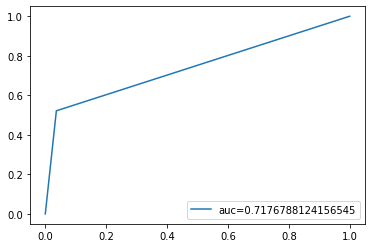

In [102]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 6.6 Построим полученное дерево DesicionTree

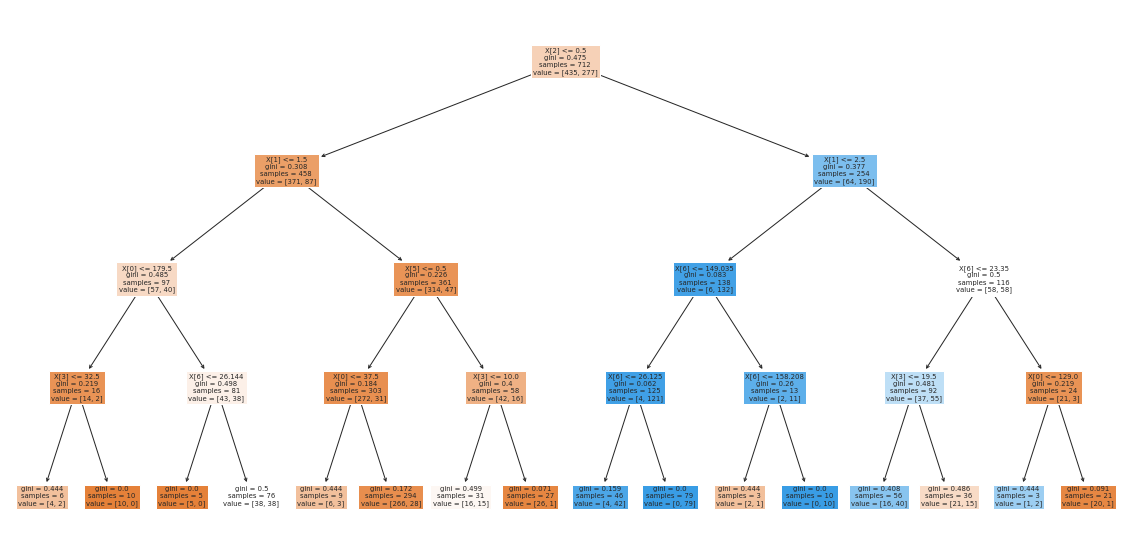

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

### 7. Бустинги

### 7.1 CatBoost

In [103]:
!pip3 install catboost

In [104]:
# Catboost
from catboost import CatBoostClassifier
classifier2 = CatBoostClassifier()


In [105]:
classifier2.fit(X_train, y_train, verbose=100)
y_pred_cb = classifier2.predict(X_test)

Learning rate set to 0.008911
0:	learn: 0.6878193	total: 5.14ms	remaining: 5.14s
100:	learn: 0.4424348	total: 279ms	remaining: 2.49s
200:	learn: 0.3829907	total: 430ms	remaining: 1.71s
300:	learn: 0.3524717	total: 755ms	remaining: 1.75s
400:	learn: 0.3297278	total: 1.04s	remaining: 1.55s
500:	learn: 0.3126021	total: 1.46s	remaining: 1.46s
600:	learn: 0.2991716	total: 1.6s	remaining: 1.06s
700:	learn: 0.2857463	total: 1.98s	remaining: 843ms
800:	learn: 0.2744368	total: 2.33s	remaining: 580ms
900:	learn: 0.2618362	total: 2.6s	remaining: 286ms
999:	learn: 0.2503731	total: 3.05s	remaining: 0us


In [106]:
# Измерим качество модели
accuracy = accuracy_score(y_pred_cb, y_test)
print(accuracy)

0.8100558659217877


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_cb)

array([[100,  10],
       [ 24,  45]])

In [109]:
print(recall_score(y_test, y_pred_cb))
print(precision_score(y_test, y_pred_cb))

0.6521739130434783
0.8181818181818182


In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test, y_pred)
auc

0.742687747035573

### 7.2 XGBoost

### 7.3 LightGBM